In [1]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# setting up options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
#loading datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.drop('id', axis = 1, inplace = True)
test.drop('id', axis = 1, inplace = True)

In [4]:
train.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0          0          0          6          1          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          1   
3          0          0          7          0          1          5   
4          1          0          0          0          0          0   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0          0          0          7          0           0           0   
1          0          0          0          0           0           0   
2          0          3          0          0           1           0   
3          2          2          0          1           2           0   
4          0          0          0          0           0           0   

   feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  \
0           3           0           1           0           0           3   
1           1           0           0           0           0           0   
2           0           0           0           0           0           0   
3           5           0           0           4           0           0   
4           0           0           0           0           0           0   

   feature_18  feature_19  feature_20  feature_21  feature_22  feature_23  \
0           3           1           0           2           0           0   
1           0           0           0           0           0           0   
2           0           5           4           0           0           0   
3          22           2           1           0           0           0   
4           0           0           1           0           0           0   

   feature_24  feature_25  feature_26  feature_27  feature_28  feature_29  \
0           0           0           0           0           1           0   
1           0           0           0           0           1           0   
2           0           0           0           0           0           1   
3           0           3           0          37           0           1   
4           0           1           0           0           0           0   

   feature_30  feature_31  feature_32  feature_33  feature_34  feature_35  \
0           0           1           0           0           0           0   
1           0           0           0           0           0           1   
2           0           0           0           0           2           0   
3           3          13           0          10           0           3   
4           0           0           0           0           0           0   

   feature_36  feature_37  feature_38  feature_39  feature_40  feature_41  \
0           0          11           0           0           0           0   
1           0           0           0           0           0           0   
2           0           5           0           5           0           1   
3           1           1           0           7           0           0   
4           0           2           0           5           0           0   

   feature_42  feature_43  feature_44  feature_45  feature_46  feature_47  \
0           0           9           0           0           0           0   
1           0           2           0           0           1           0   
2           0           0           0           1           0           0   
3           2           0           1           0           0           0   
4           0           0           0           0           0           0   

   feature_48  feature_49  feature_50  feature_51  feature_52  feature_53  \
0           0           0           3           0           1           3   
1           0           0           0           0           0           0   
2           1           0           7           0           1           1   
3           0           0           0          10  

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 76 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   feature_0   200000 non-null  int64 
 1   feature_1   200000 non-null  int64 
 2   feature_2   200000 non-null  int64 
 3   feature_3   200000 non-null  int64 
 4   feature_4   200000 non-null  int64 
 5   feature_5   200000 non-null  int64 
 6   feature_6   200000 non-null  int64 
 7   feature_7   200000 non-null  int64 
 8   feature_8   200000 non-null  int64 
 9   feature_9   200000 non-null  int64 
 10  feature_10  200000 non-null  int64 
 11  feature_11  200000 non-null  int64 
 12  feature_12  200000 non-null  int64 
 13  feature_13  200000 non-null  int64 
 14  feature_14  200000 non-null  int64 
 15  feature_15  200000 non-null  int64 
 16  feature_16  200000 non-null  int64 
 17  feature_17  200000 non-null  int64 
 18  feature_18  200000 non-null  int64 
 19  feature_19  200000 non-

In [6]:
train.describe().T.style.bar(subset=['mean'], color='#606ff2').background_gradient(subset=['std'],cmap='YlOrBr').bar(subset=['max'],color='green')

In [7]:
# comparing zero rate in a column
pd.DataFrame((train==0).sum()/len(train), columns=["zero_rate"]).style.bar(subset=['zero_rate'], color='#20c8f2')

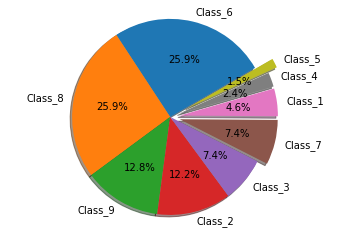

In [8]:
#visualizing in Pie chart
labels = 'Class_6', 'Class_8', 'Class_9', 'Class_2', 'Class_3', 'Class_7', 'Class_1', 'Class_4', 'Class_5'
explode = (0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.2)

fig1, ax1 = plt.subplots()
ax1.pie(train['target'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')
plt.show()

In [9]:
classes = ['Class_6', 'Class_8', 'Class_9', 'Class_2', 'Class_3', 'Class_7', 'Class_1', 'Class_4', 'Class_5']
values = [51811, 51763, 25542, 24431, 14798, 14769, 9118, 4704, 3064]

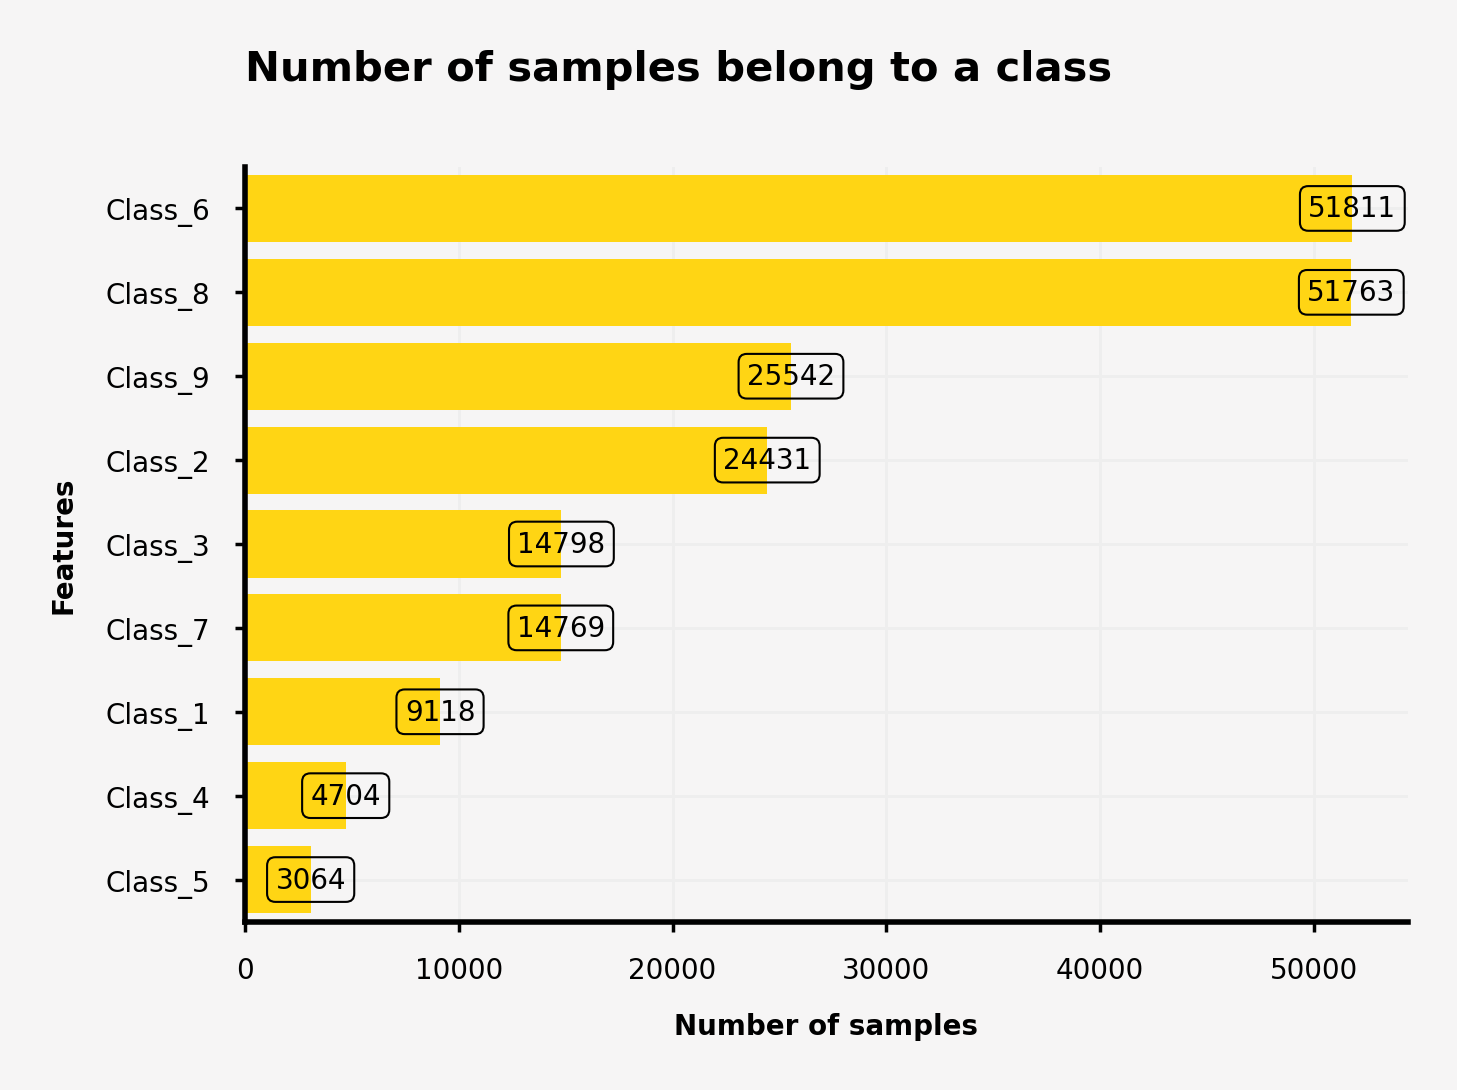

In [10]:
plt.rcParams['figure.dpi'] = 500
fig = plt.figure(figsize=(3, 2), facecolor='#f6f5f5')

#Specifies the geometry of the grid that a subplot will be placed.
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.4, hspace=0.1)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*75)

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(y=classes, x=values,  
                      zorder=2, linewidth=0, orient=None, saturation=1, alpha=1)
ax0_sns.set_xlabel("Number of samples",fontsize=4, weight='bold')
ax0_sns.set_ylabel("Features",fontsize=4, weight='bold')

#Change the appearance of ticks, tick labels, and gridlines.
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -1.9, 'Number of samples belong to a class', fontsize=6, ha='left', va='top', weight='bold')

# data label
for p in ax0.patches:
    value = f'{p.get_width():.0f}'
    x = p.get_x() + p.get_width() + 3
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

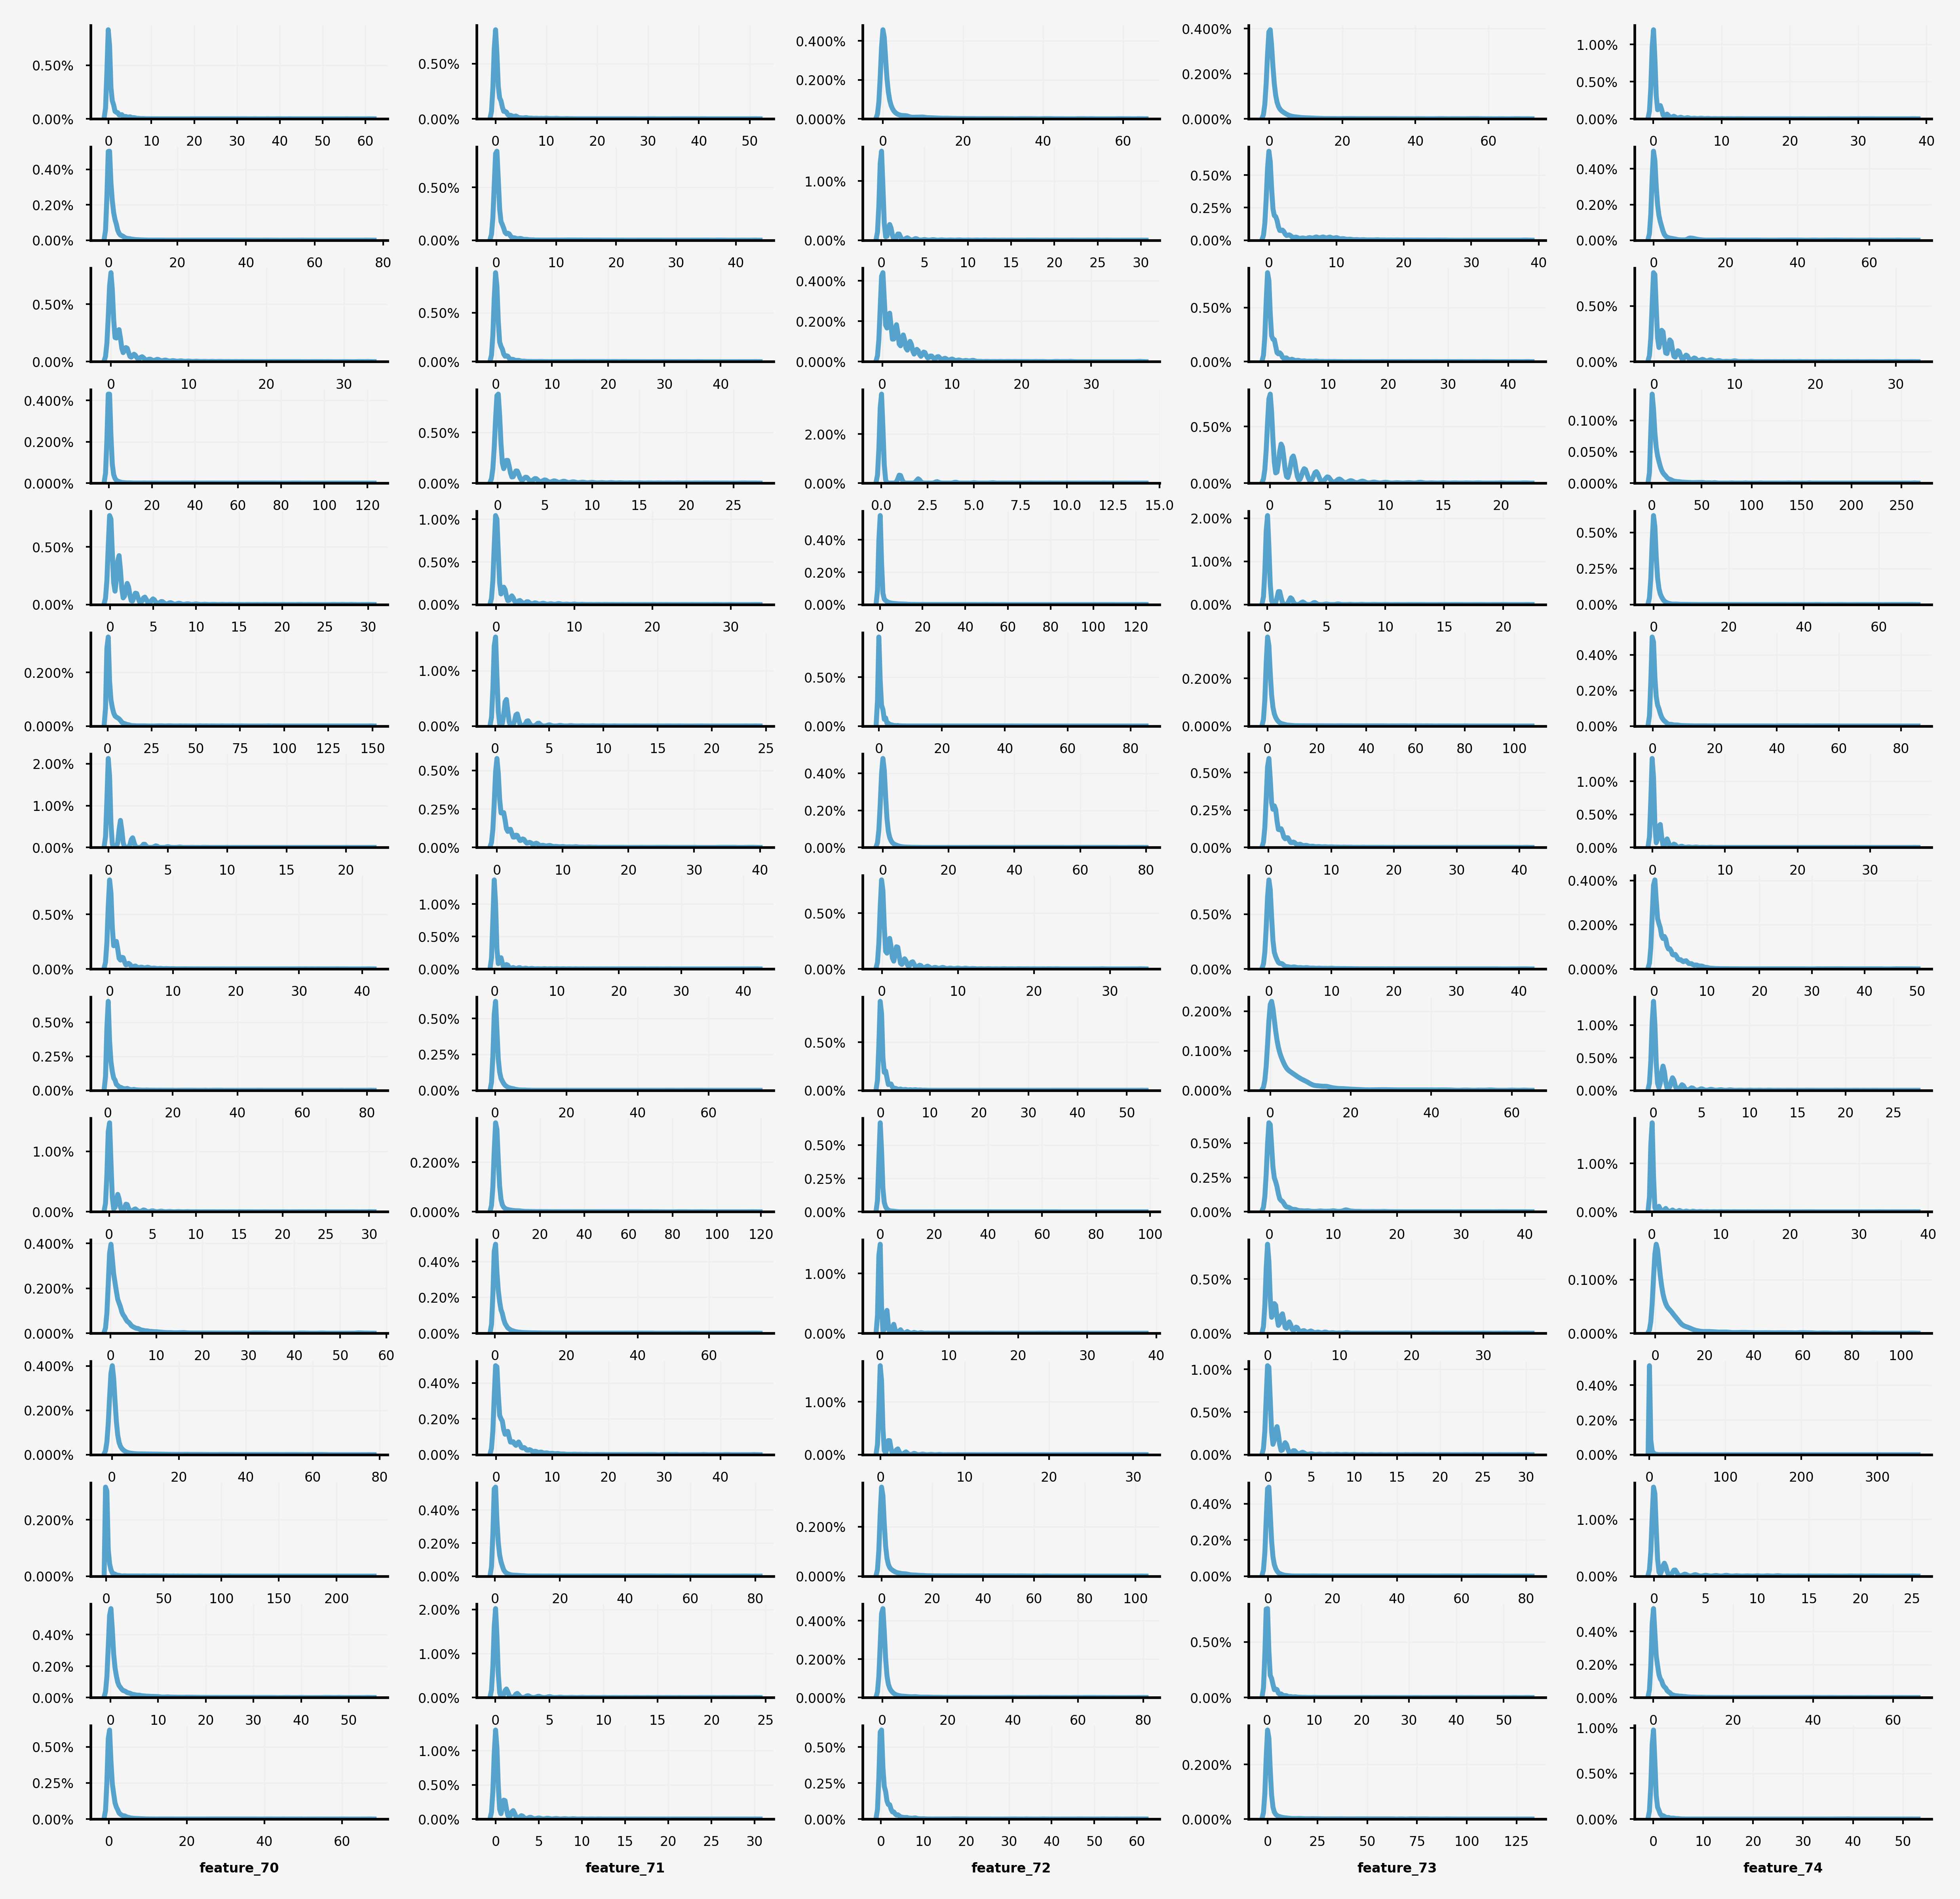

In [11]:
#let's check out the kernel density estimation for every column
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(15, 5)
gs.update(wspace=0.3, hspace=0.3)

background_color = "#f6f5f5"
sns.set_palette('icefire')

run_no = 0
for row in range(0, 15):
    for col in range(0, 5):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

new_train = train.drop('target', axis = 1)
features = list(new_train.columns) 

run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)],x=col, data = new_train)
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5, length=1.5)
    locals()["ax"+str(run_no)].yaxis.set_major_formatter(ticker.PercentFormatter())
    run_no += 1

plt.show()

In [12]:
# let's get a idea about value range
plt.figure(figsize=(18,25))
sns.boxplot(data=train, orient="h");

In [13]:
#finding unique values for train set
features = list(train.columns)
for feature in features:
    temp = train[feature].unique()
    train_unique_values = temp
train_unique_values = np.unique(train_unique_values)
train_unique_feature = pd.DataFrame(train[features].nunique())
train_unique_feature = train_unique_feature.reset_index(drop=False)
train_unique_feature.columns = ['Features', 'Count']

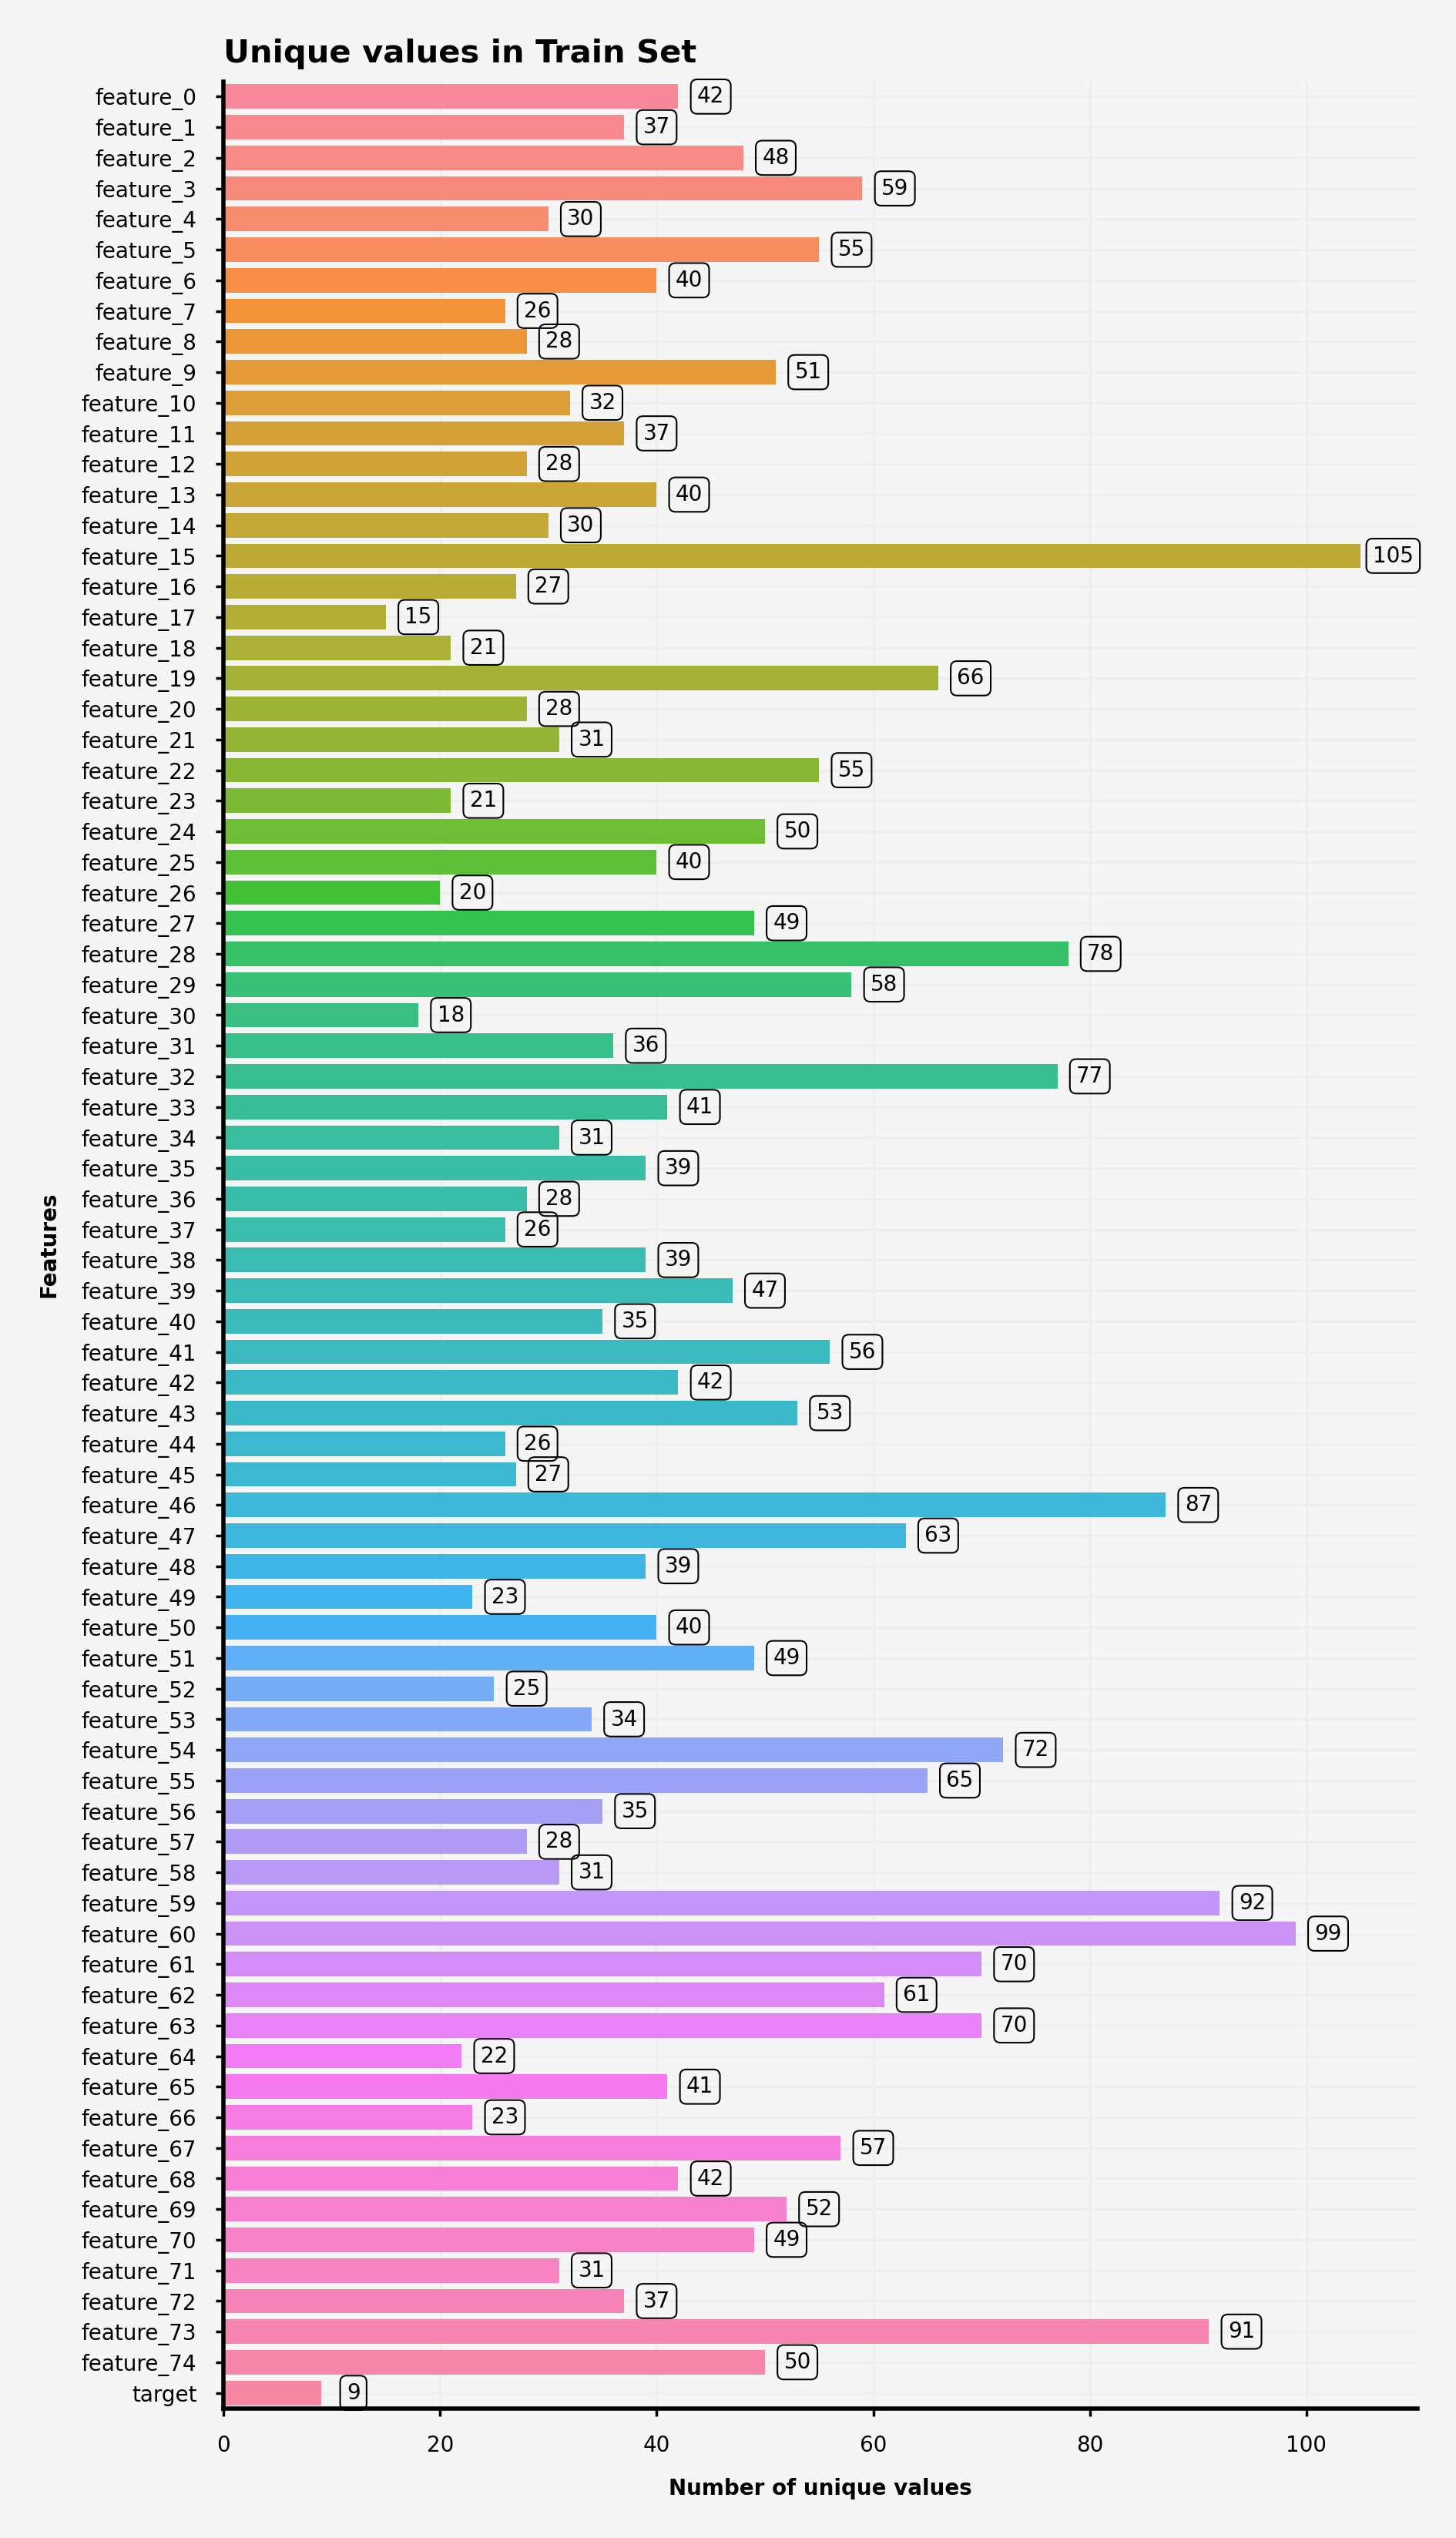

In [14]:
plt.rcParams['figure.dpi'] = 500
fig = plt.figure(figsize=(4, 8), facecolor='#f6f5f5')

#Specifies the geometry of the grid that a subplot will be placed.
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.4, hspace=0.1)

background_color = "#f6f5f5"
sns.set_palette('rocket_r')

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(y=train_unique_feature['Features'], x=train_unique_feature['Count'],  
                      zorder=2, linewidth=0, orient=None, saturation=1, alpha=1)
ax0_sns.set_xlabel("Number of unique values",fontsize=4, weight='bold')
ax0_sns.set_ylabel("Features",fontsize=4, weight='bold')

#Change the appearance of ticks, tick labels, and gridlines.
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -1.9, 'Unique values in Train Set', fontsize=6, ha='left', va='top', weight='bold')

# data label
for p in ax0.patches:
    value = f'{p.get_width():.0f}'
    x = p.get_x() + p.get_width() + 3
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

In [15]:
#finding unique values for test set
features = list(test.columns)
for feature in features:
    temp = test[feature].unique()
    test_unique_values = temp
test_unique_values = np.unique(test_unique_values)
test_unique_features = pd.DataFrame(test[features].nunique())
test_unique_features = test_unique_features.reset_index(drop=False)
test_unique_features.columns = ['Features', 'Count']

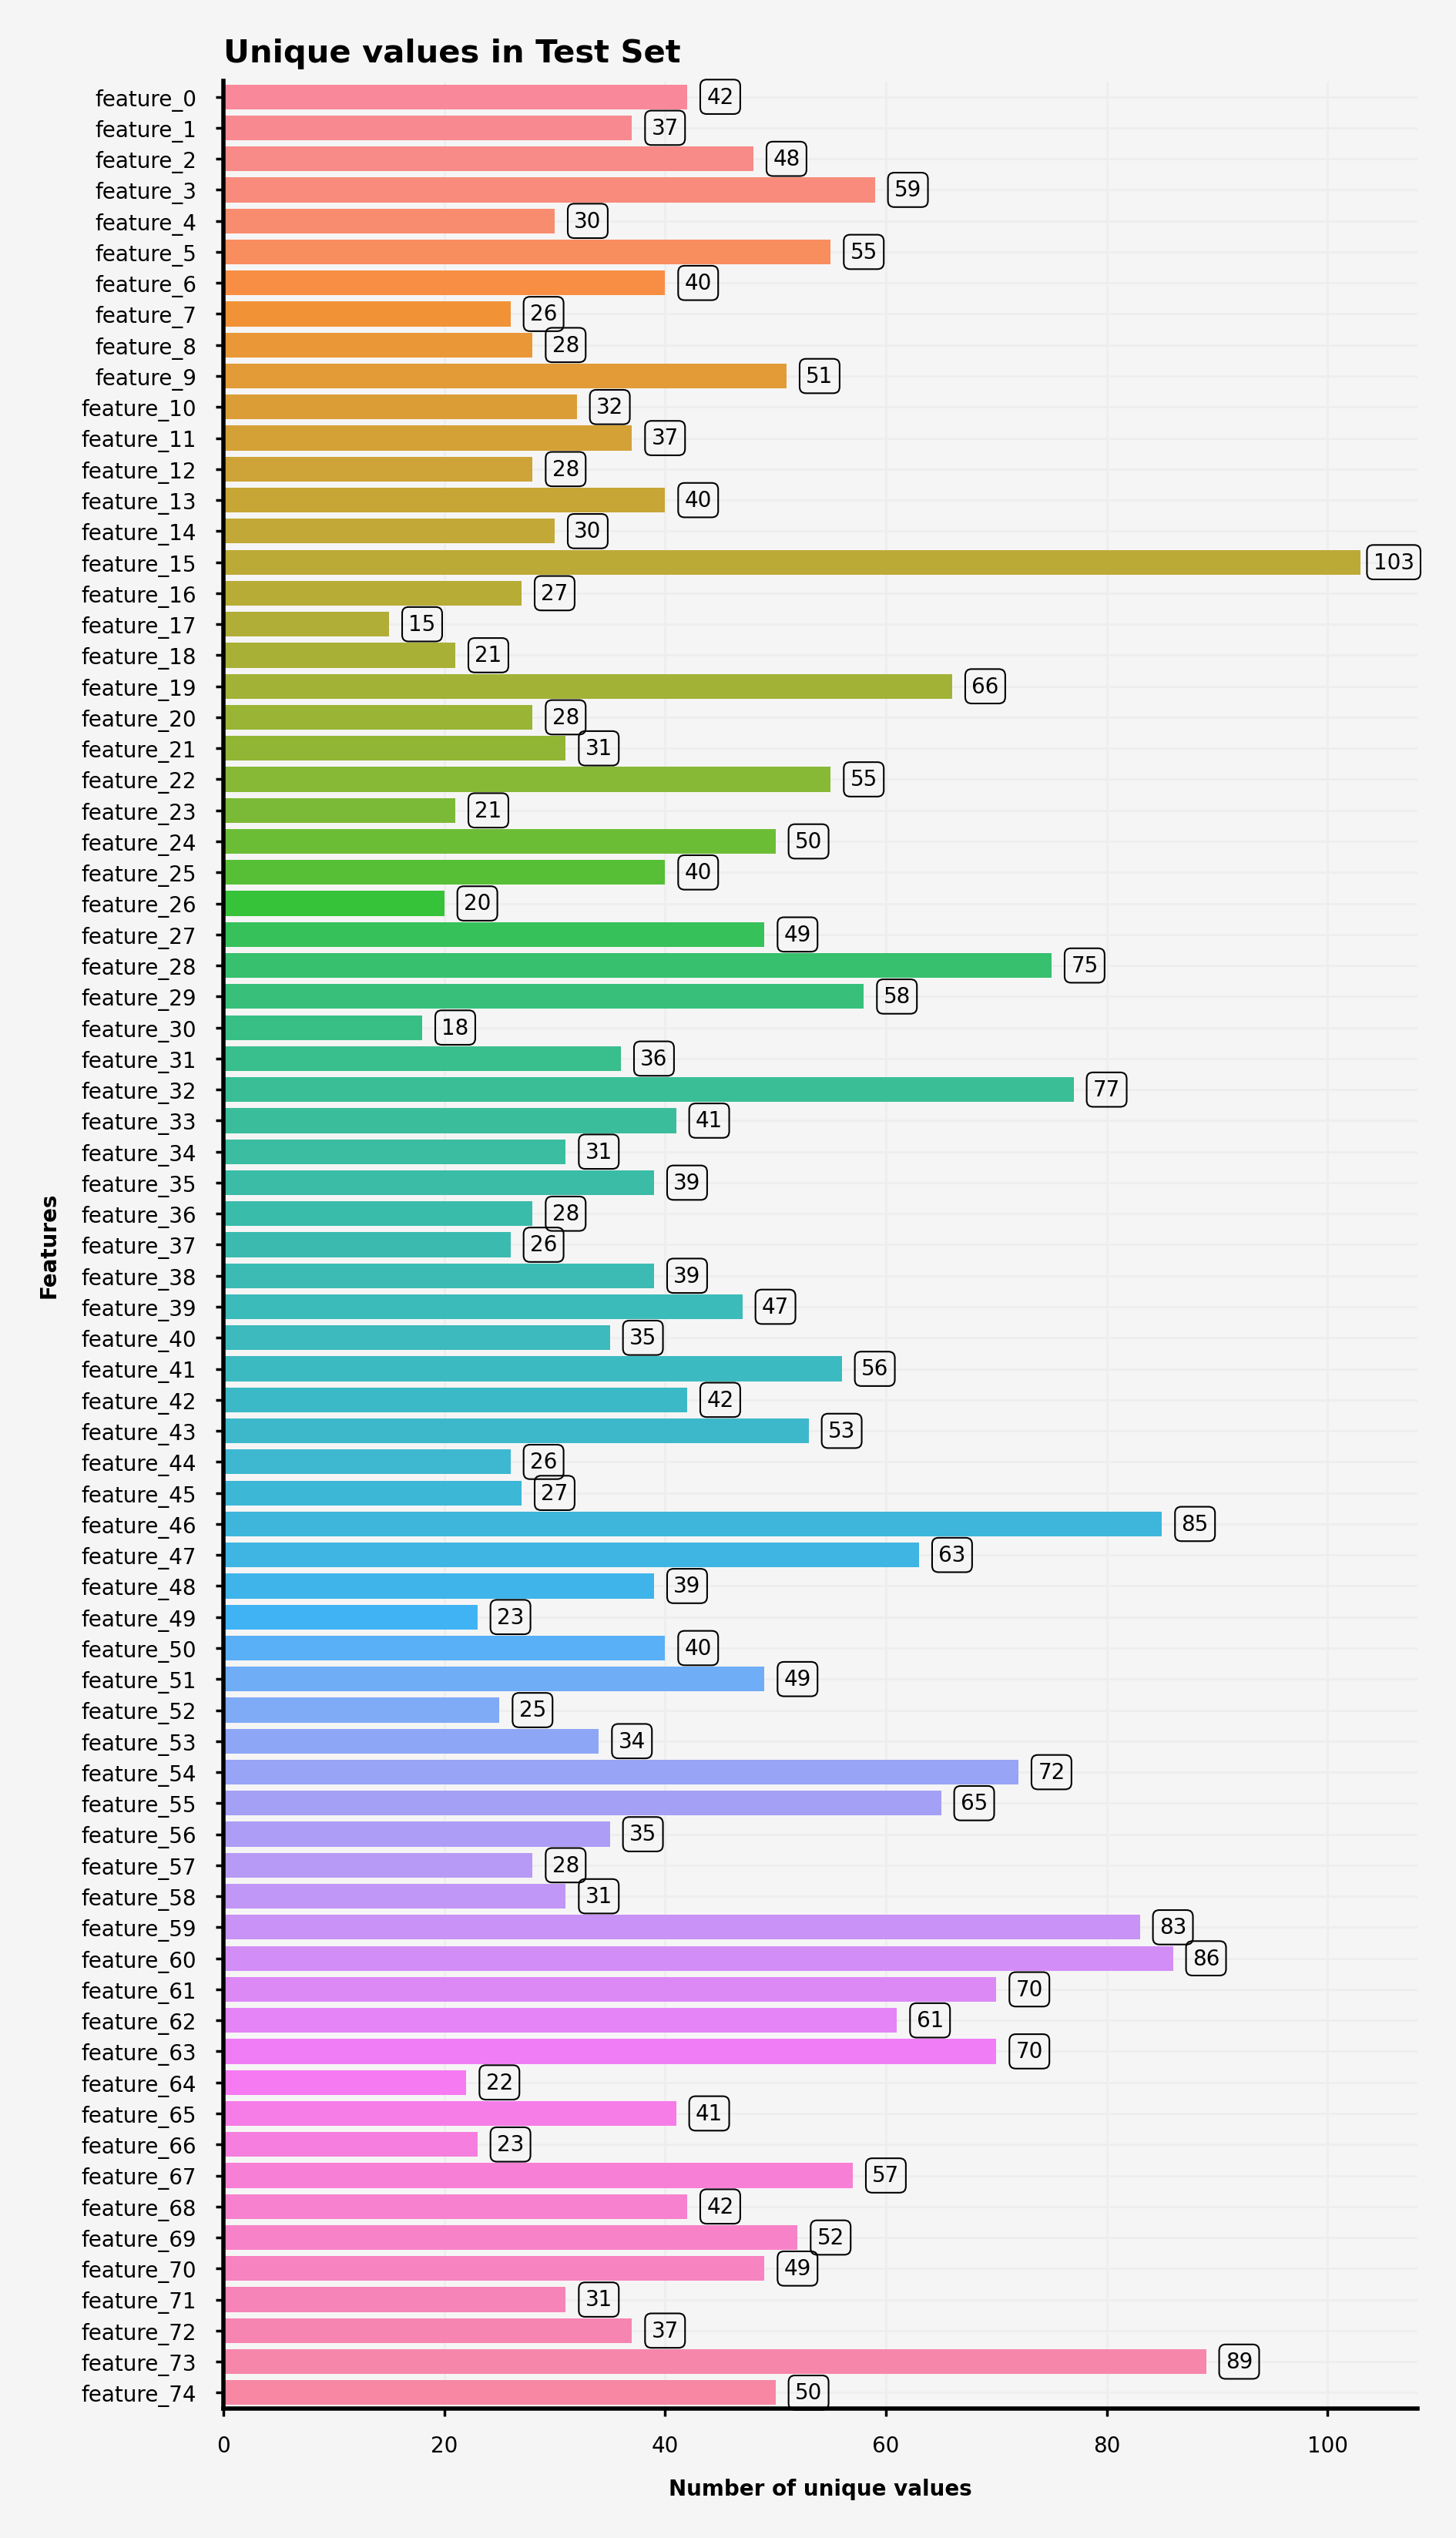

In [16]:
plt.rcParams['figure.dpi'] = 500
fig = plt.figure(figsize=(4, 8), facecolor='#f6f5f5')

#Specifies the geometry of the grid that a subplot will be placed.
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.4, hspace=0.1)

background_color = "#f6f5f5"
sns.set_palette('vlag')

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(y=test_unique_features['Features'], x=test_unique_features['Count'],  
                      zorder=2, linewidth=0, saturation=1, alpha=1)
ax0_sns.set_xlabel("Number of unique values",fontsize=4, weight='bold')
ax0_sns.set_ylabel("Features",fontsize=4, weight='bold')

#Change the appearance of ticks, tick labels, and gridlines.
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -1.9, 'Unique values in Test Set', fontsize=6, ha='left', va='top', weight='bold')

# data label
for p in ax0.patches:
    value = f'{p.get_width():.0f}'
    x = p.get_x() + p.get_width() + 3
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

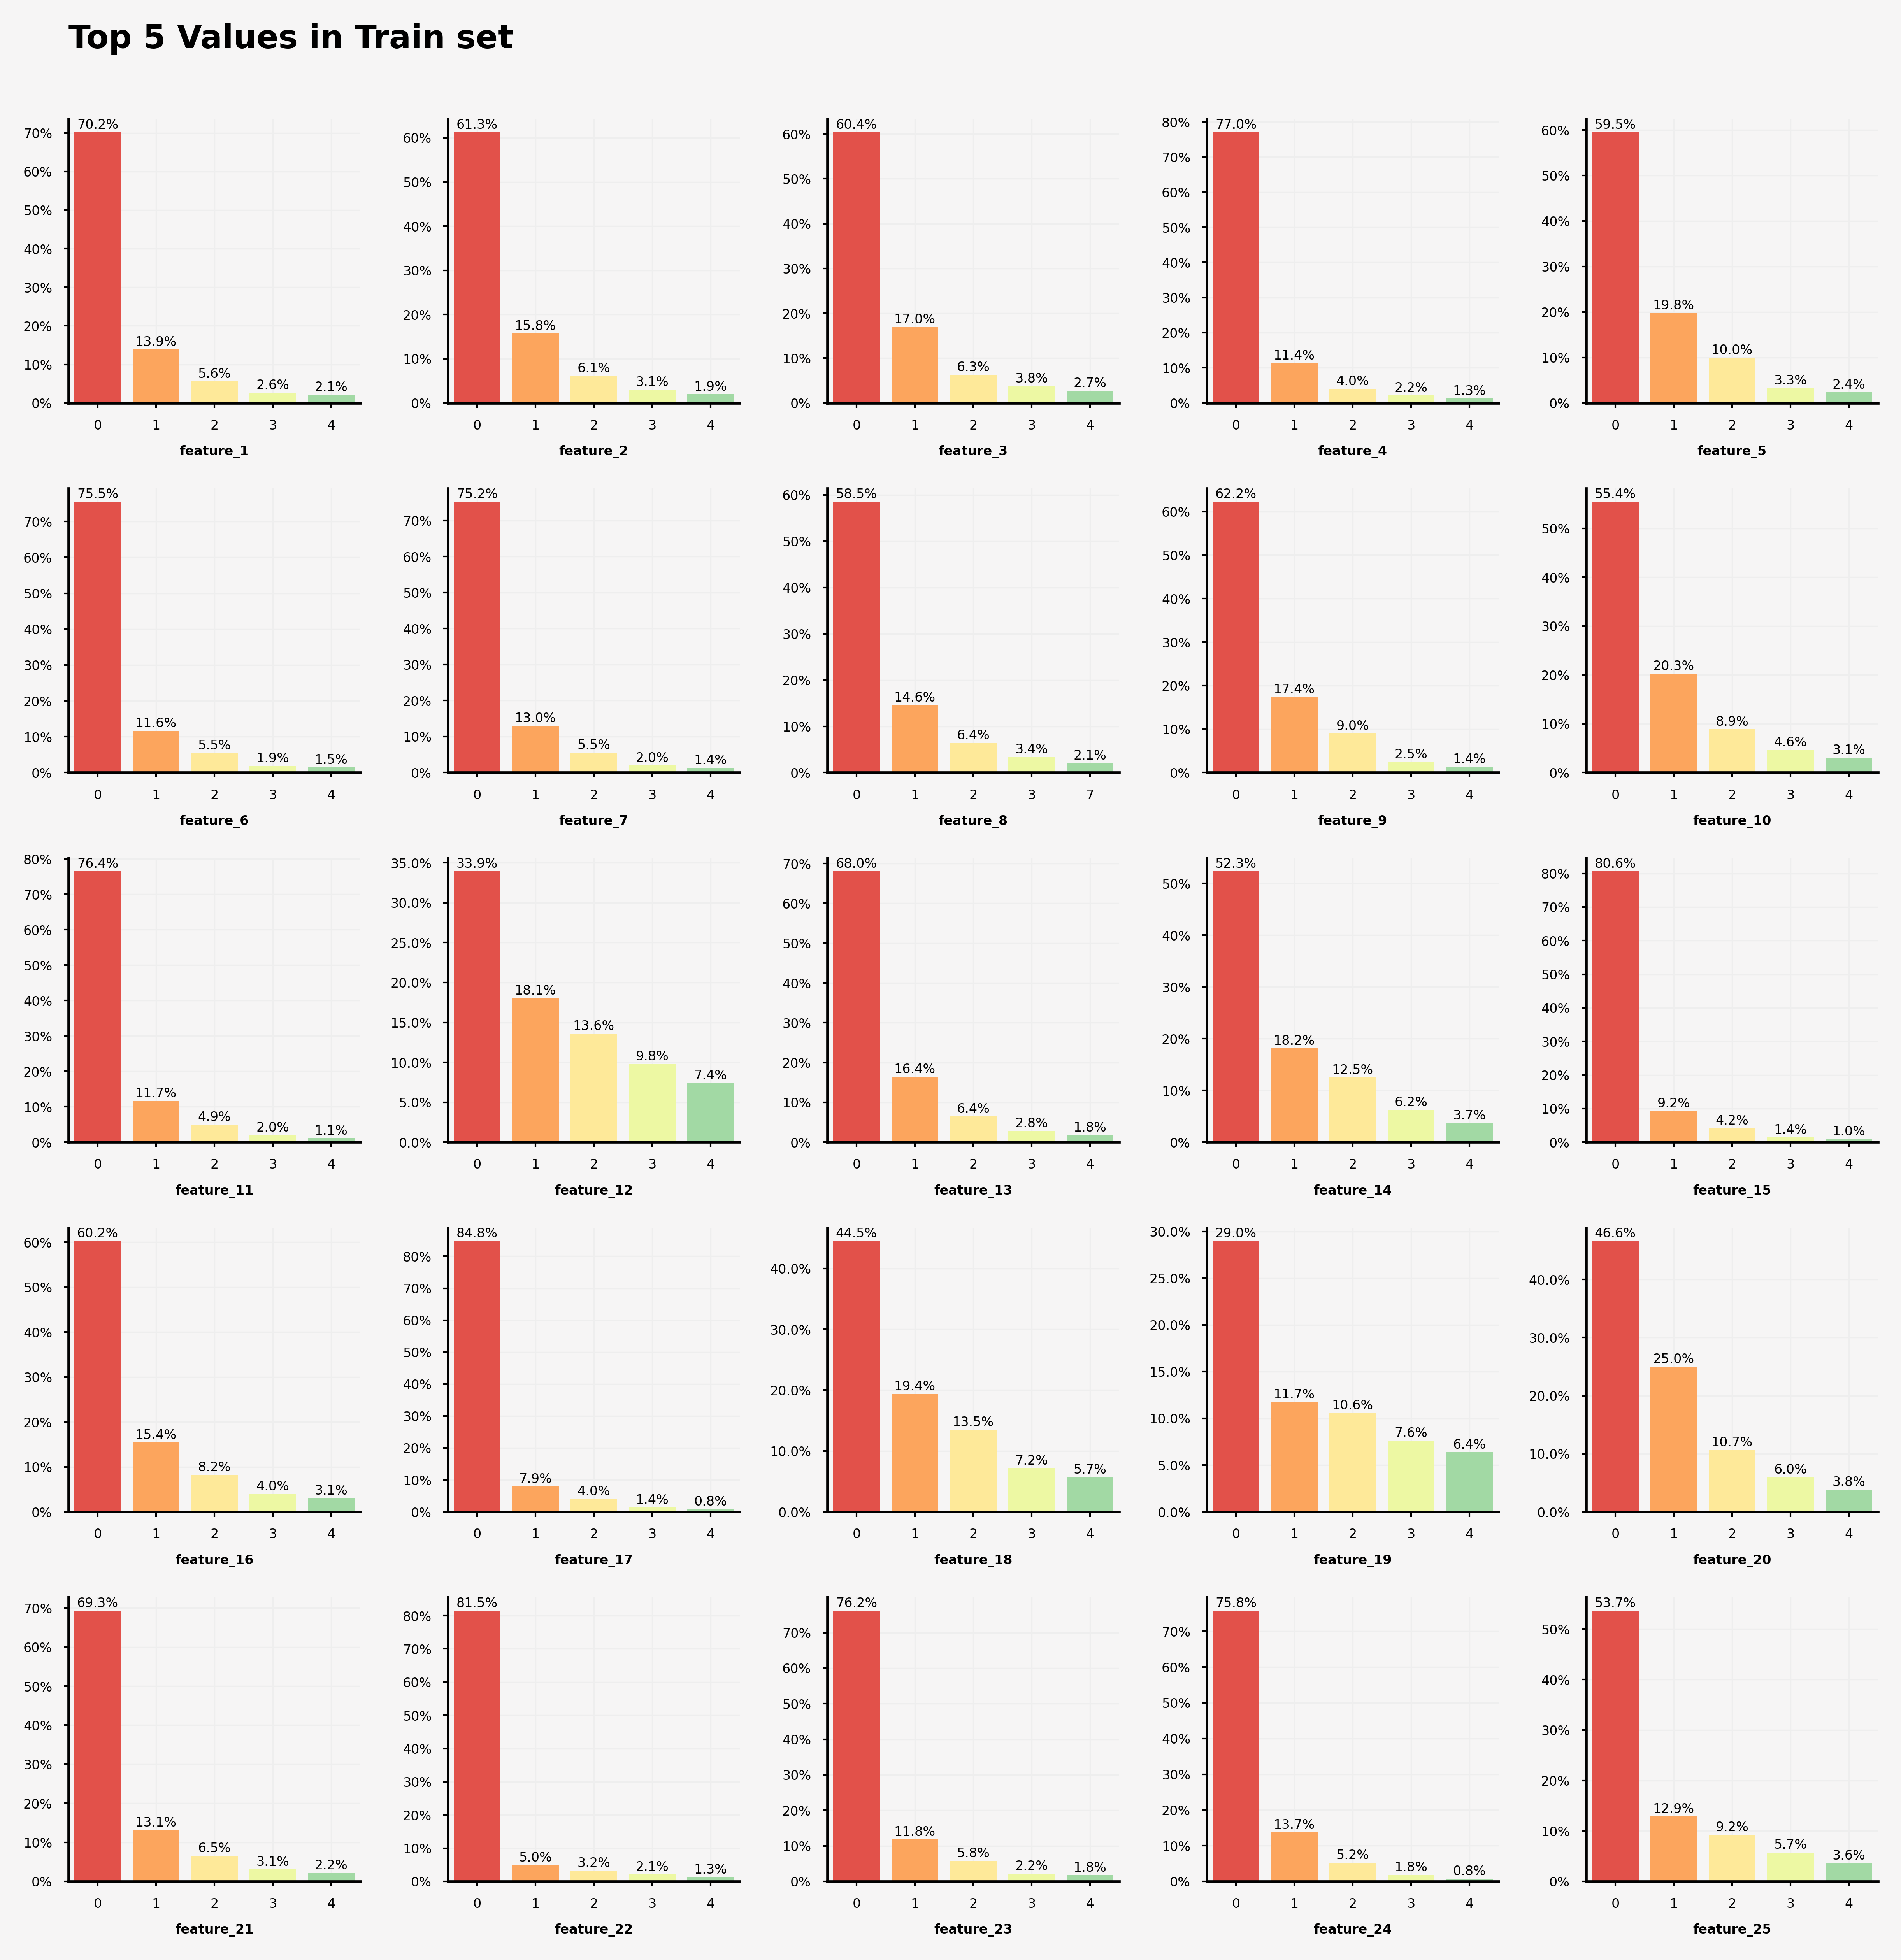

In [17]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(5, 5)
gs.update(wspace=0.3, hspace=0.3)

background_color = "#f6f5f5"
sns.set_palette('Spectral')

run_no = 0
for row in range(0, 5):
    for col in range(0, 5):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

ax0.text(-0.5, 92, 'Top 5 Values in Train set', fontsize=10, fontweight='bold')       

features = list(train.columns[1:26])

run_no = 0
for col in features:
    temp_df = pd.DataFrame(train[col].value_counts())[:5]
    temp_df = temp_df.reset_index(drop=False)
    temp_df.columns = ['Number', 'Count']
    sns.barplot(ax=locals()["ax"+str(run_no)],x=temp_df['Number'], y=temp_df['Count']/len(train)*100, zorder=2, linewidth=0, alpha=1, saturation=1)
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5, length=1.5)
    locals()["ax"+str(run_no)].yaxis.set_major_formatter(ticker.PercentFormatter())
    
    # data label
    for p in locals()["ax"+str(run_no)].patches:
        percentage = f'{p.get_height():.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        locals()["ax"+str(run_no)].text(x, y, percentage, ha='center', va='center', fontsize=4)

    run_no += 1

plt.show()

## Dimentionality reduction

#### Note: This section wasn't executed to reduce the size of the notebook.

In [ ]:
label_dict = {val:idx for idx, val in enumerate(sorted(train['target'].unique()))}
train['target'] = train['target'].map(label_dict)

In [ ]:
from umap import UMAP

train_sub = train.sample(50000, random_state=72)
target = train_sub['target']
umap = UMAP(random_state=0)
dr = umap.fit_transform(train_sub.iloc[:,:-1], target)

In [ ]:
light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

In [ ]:
# let's reduce dimentionality and visualize train set data
fig = plt.figure(figsize=(20, 20))
gs = fig.add_gridspec(10, 9)
ax = fig.add_subplot(gs[:-1,:])

sub_axes = [None] * 9
for idx in range(9): 
    sub_axes[idx] = fig.add_subplot(gs[-1,idx])

for idx in range(9):
    ax.scatter(x=dr[:,0][target==idx], y=dr[:,1][target==idx],
              s=10, alpha=0.2
              )

    for j in range(9):
        sub_axes[j].scatter(x=dr[:,0][target==idx], y=dr[:,1][target==idx],
                            s=10, alpha = 0.4 if idx==j else 0.008, 
                            color = '#%02x%02x%02x' % light_palette[j] if idx==j else 'gray',
                            zorder=(idx==j)
                           )
        
    
    sub_axes[idx].set_xticks([])
    sub_axes[idx].set_yticks([])
    sub_axes[idx].set_xlabel('')
    sub_axes[idx].set_ylabel('')
    sub_axes[idx].set_title(f'Class_{idx+1}')
    sub_axes[idx].spines['right'].set_visible(True)
    sub_axes[idx].spines['top'].set_visible(True)

ax.set_title('Dimenstion Reductio by UMAP in Train set', fontweight='bold', fontfamily='serif', fontsize=23, loc='center')   
    
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

fig.tight_layout()
plt.show()

In [ ]:
test_sub = train.sample(50000, random_state=72)
dr_test = umap.transform(test_sub)

In [ ]:
import matplotlib.patches as mpatches


fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.scatter(x=dr[:,0], y=dr[:,1], 
           color = '#%02x%02x%02x' % light_palette[0],
           s=10, alpha=0.3, label='Train')
ax.scatter(x=dr_test[:,0], y=dr_test[:,1], 
           color = '#%02x%02x%02x' % light_palette[1],
           s=10, alpha=0.3, label='Test')


ax.set_title('Dimenstion Reduction Comparision between Train and Test set', fontweight='bold', fontfamily='serif', fontsize=20, loc='left')   
    
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

train_dot = mpatches.Patch(color='#%02x%02x%02x' % light_palette[0], label='Train')
test_dot = mpatches.Patch(color='#%02x%02x%02x' % light_palette[1], label='Train')
ax.legend(handles=[train_dot, test_dot], loc='lower center', ncol = 2, fontsize=15)
fig.tight_layout()
plt.show()
